# Harmonic radiation example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
sys.path.append('/Users/riverr/Documents/pyfel1d/main/')
from particles import ParticleLoader
from fel import OneDFELSolver
import time

This notebook illustrates the ability of pyfel1d to simulate harmonic radiation.

# Simulation set up 

In [2]:
solver = OneDFELSolver(Lzhat=20, ## undulator length
                       Nzhat=1500, ## number of steps in undulator
                       Lzeta=30, ## length of beam window
                       Nzeta=500, ## z steps before slippage is applied
                       time_independent=False) 

In [3]:
# specify harmonics to include and reference K0 for JJ calculations
solver.harmonics = np.array([1, 3, 5]) 
solver.K0 = 3

In [4]:
# generate initial beam with shot noise and no energy spread
solver.generate_beam(bdes=1e-3)

# Run simulation and look at results

In [5]:
%%time
solver.run_simulation(steps_between_store = 10, ## store the field every 10 steps 
                      verbose=True) ## print status in 10% intervals 

Beam profile $\chi$ is unspecified, setting it to 1 for all zeta
Found no input taper array, assuming it is zero everywhere
Input seed field $a_0$ is unspecified, setting it to zero
Beginning simulation including harmonics: [1 3 5]
0% done
10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
Done
CPU times: user 4min 31s, sys: 7.9 s, total: 4min 39s
Wall time: 40 s


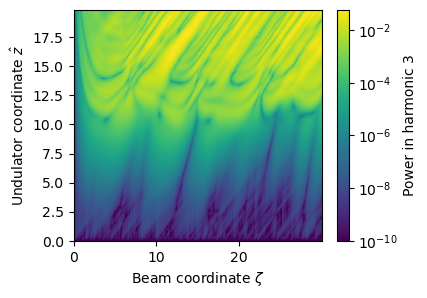

In [6]:
plt.figure(figsize=(4,3))
i = 1 ## harmonic to plot
plt.imshow(1e-12+np.abs(solver.a_store[:,i])**2, aspect='auto', origin='lower', norm=LogNorm(vmin=1e-10), extent=[0, solver.zeta_arr.max(), 0, solver.zhat_store.max()])
plt.xlabel(r'Beam coordinate $\zeta$')
plt.ylabel(r'Undulator coordinate $\hat{z}$')
plt.colorbar(label=f'Power in harmonic {solver.harmonics[i]}')

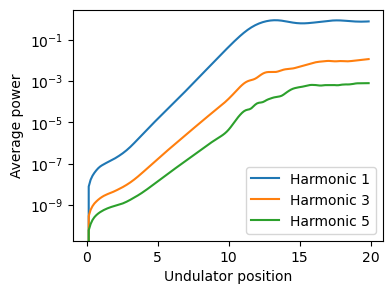

In [7]:
plt.figure(figsize=(4,3))
for i,h in enumerate(solver.harmonics):
    plt.plot(solver.zhat_store, np.mean(np.abs(solver.a_store[:,i])**2, axis=-1), label=f'Harmonic {h}')
plt.xlabel('Undulator position')
plt.ylabel('Average power')
plt.legend()
plt.yscale('log')
    